# **Image Classification Using CNN**

# 📥 Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, Activation, Flatten, InputLayer
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomContrast, RandomTranslation


# 🗃️ Load Dataset


In [2]:
train_data_dir = "../input/chessman-image-dataset/Chessman-image-dataset/Chess"
os.listdir(train_data_dir)
image_size = (229,131)

dataset = image_dataset_from_directory(
    train_data_dir,
    image_size=image_size
)


Found 552 files belonging to 6 classes.


2022-04-21 14:37:16.361519: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# 🔥 Visualization


2022-04-21 14:37:16.665756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


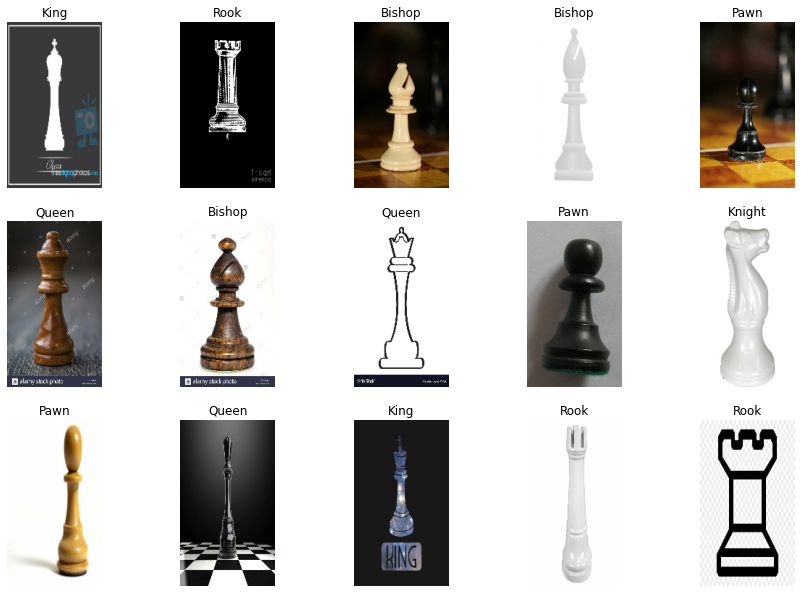

In [3]:
plt.figure(figsize=(15, 25))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(15):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# ✂️ Train & Test Split


In [4]:
train_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    seed=8,
    subset="training",
    label_mode="categorical",
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    seed=6,
    subset="validation",
    label_mode="categorical",
    image_size=image_size
)


Found 552 files belonging to 6 classes.
Using 497 files for training.
Found 552 files belonging to 6 classes.
Using 55 files for validation.


# 📚 Train The Models


In [5]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(1./16),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.2),  
    RandomTranslation(0.1,0.1)
])

## 🦾 CNN Model

In [6]:
model = Sequential()

model.add(InputLayer(input_shape=(229,131, 3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [7]:
model1 = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=30,
    verbose=1)

model.save('model1.h5')

Epoch 1/30


 1/16 [>.............................] - ETA: 1:29 - loss: 1.7998 - accuracy: 0.1875

 2/16 [==>...........................] - ETA: 27s - loss: 1.7951 - accuracy: 0.1875 

 3/16 [====>.........................] - ETA: 23s - loss: 1.7988 - accuracy: 0.1875

 4/16 [======>.......................] - ETA: 21s - loss: 1.8032 - accuracy: 0.1797

 5/16 [========>.....................] - ETA: 18s - loss: 1.8021 - accuracy: 0.1688

 6/16 [==========>...................] - ETA: 16s - loss: 1.8004 - accuracy: 0.1562

 7/16 [============>.................] - ETA: 15s - loss: 1.7970 - accuracy: 0.1652

 8/16 [==============>...............] - ETA: 13s - loss: 1.7986 - accuracy: 0.1602

 9/16 [===============>..............] - ETA: 11s - loss: 1.7953 - accuracy: 0.1771

10/16 [=================>............] - ETA: 9s - loss: 1.7960 - accuracy: 0.1688 

11/16 [===================>..........] - ETA: 8s - loss: 1.7946 - accuracy: 0.1705

12/16 [=====================>........] - ETA: 6s - loss: 1.7937 - accuracy: 0.1693

13/16 [=======================>......] - ETA: 4s - loss: 1.7955 - accuracy: 0.1659

14/16 [=========================>....] - ETA: 3s - loss: 1.7935 - accuracy: 0.1719

15/16 [===========================>..] - ETA: 1s - loss: 1.7922 - accuracy: 0.1792

16/16 [==============================] - ETA: 0s - loss: 1.7938 - accuracy: 0.1791

16/16 [==============================] - 30s 2s/step - loss: 1.7938 - accuracy: 0.1791 - val_loss: 1.7938 - val_accuracy: 0.1455


Epoch 2/30


 1/16 [>.............................] - ETA: 46s - loss: 1.8043 - accuracy: 0.0938

 2/16 [==>...........................] - ETA: 22s - loss: 1.7810 - accuracy: 0.1250

 3/16 [====>.........................] - ETA: 20s - loss: 1.7750 - accuracy: 0.1562

 4/16 [======>.......................] - ETA: 19s - loss: 1.7876 - accuracy: 0.1641

 5/16 [========>.....................] - ETA: 17s - loss: 1.7850 - accuracy: 0.1625

 6/16 [==========>...................] - ETA: 16s - loss: 1.7812 - accuracy: 0.1771

 7/16 [============>.................] - ETA: 14s - loss: 1.7792 - accuracy: 0.1875

 8/16 [==============>...............] - ETA: 12s - loss: 1.7793 - accuracy: 0.1953

 9/16 [===============>..............] - ETA: 10s - loss: 1.7881 - accuracy: 0.1840

10/16 [=================>............] - ETA: 9s - loss: 1.7842 - accuracy: 0.1844 

11/16 [===================>..........] - ETA: 7s - loss: 1.7804 - accuracy: 0.1875

12/16 [=====================>........] - ETA: 6s - loss: 1.7805 - accuracy: 0.1849

13/16 [=======================>......] - ETA: 4s - loss: 1.7777 - accuracy: 0.1779

14/16 [=========================>....] - ETA: 3s - loss: 1.7803 - accuracy: 0.1786

15/16 [===========================>..] - ETA: 1s - loss: 1.7831 - accuracy: 0.1771

16/16 [==============================] - ETA: 0s - loss: 1.7839 - accuracy: 0.1771

16/16 [==============================] - 26s 2s/step - loss: 1.7839 - accuracy: 0.1771 - val_loss: 1.7917 - val_accuracy: 0.1273


Epoch 3/30


 1/16 [>.............................] - ETA: 46s - loss: 1.7589 - accuracy: 0.2500

 2/16 [==>...........................] - ETA: 24s - loss: 1.7735 - accuracy: 0.2188

 3/16 [====>.........................] - ETA: 23s - loss: 1.7765 - accuracy: 0.2500

 4/16 [======>.......................] - ETA: 22s - loss: 1.7693 - accuracy: 0.2500

 5/16 [========>.....................] - ETA: 19s - loss: 1.7696 - accuracy: 0.2375

 6/16 [==========>...................] - ETA: 17s - loss: 1.7688 - accuracy: 0.2292

 7/16 [============>.................] - ETA: 15s - loss: 1.7680 - accuracy: 0.2188

 8/16 [==============>...............] - ETA: 13s - loss: 1.7710 - accuracy: 0.2109

 9/16 [===============>..............] - ETA: 11s - loss: 1.7709 - accuracy: 0.1979

10/16 [=================>............] - ETA: 10s - loss: 1.7698 - accuracy: 0.1969

11/16 [===================>..........] - ETA: 8s - loss: 1.7758 - accuracy: 0.1818 

12/16 [=====================>........] - ETA: 6s - loss: 1.7829 - accuracy: 0.1797

13/16 [=======================>......] - ETA: 4s - loss: 1.7827 - accuracy: 0.1755

In [ ]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'],'r')
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'],'r')
plt.title('Training and Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 🦾 Pre-trained CNN Models

Some of the usage patterns as follows:

- **Classifier:** The pre-trained model is used directly to classify new images.
- **Standalone Feature Extractor:** The pre-trained model, or some portion of the model, is used to pre-process images and extract relevant features.
- **Integrated Feature Extractor:** The pre-trained model, or some portion of the model, is integrated into a new model, but layers of the pre-trained model are frozen during training.
- **Weight Initialization:** The pre-trained model, or some portion of the model, is integrated into a new model, and the layers of the pre-trained model are trained in concert with the new model.

### Integrated Feature Extractor

#### ✔️ InceptionV3 Model

In [ ]:
## Pre-trained CNN model

from tensorflow.python.keras.applications.inception_v3 import InceptionV3 

model_inception_v3 = InceptionV3(
    weights='../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', # Load pre-trained weights
    include_top=False,  # Do not include the classifier at the top.
    input_shape=(229,131,3))

# Freeze the model, mark loaded layers as not trainable
for layer in model_inception_v3.layers:
    layer.trainable = False

model = Sequential()  # Create new model on top
model.add(data_augmentation)  # Apply data augmentation

# Pre-trained InceptionV3 weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.)
# outputs: `(inputs * scale)`
model.add(Rescaling(scale=1./255))
model.add(model_inception_v3)  # Add entire model
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

    
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
#This adds the entire model as a layer itself, so it's treated as one entity:
for index, layer in enumerate(model.layers):
    print("Layer: {}, Trainable: {}".format(index, layer.trainable))

In [ ]:
model2 = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=30,
    verbose=1)

model.save('model2.h5')

In [ ]:
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'],'r')
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'],'r')
plt.title('Training and Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### ✔️ Xception Model

In [ ]:
## Pre-trained CNN model 2 
from tensorflow.keras.applications import Xception
xception = Xception(weights='../input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(229,131,3))
xception.trainable = False

model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(xception)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
model3 = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=30,
    verbose=1)

model.save('model3.h5')

In [ ]:
plt.plot(model3.history['accuracy'])
plt.plot(model3.history['val_accuracy'],'r')
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model3.history['loss'])
plt.plot(model3.history['val_loss'],'r')
plt.title('Training and Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

You can see the lines for both training and testing accuracies and losses are pretty close to each other which means that the model is not overfitting.

#### ✔️ NASNetLarge Model

In [ ]:
## Pre-trained CNN model 3 

from keras.applications.nasnet import NASNetLarge

model_nasnet_large = NASNetLarge(weights='../input/nasnetlarge/NASNet-large-no-top.h5', include_top=False, input_shape=(229,131,3))
model_nasnet_large.trainable = False

model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))

model.add(model_nasnet_large)
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
model4 = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=30,
    verbose=1)

model.save('model4.h5')

In [ ]:
plt.plot(model4.history['accuracy'])
plt.plot(model4.history['val_accuracy'],'r')
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model4.history['loss'])
plt.plot(model4.history['val_loss'],'r')
plt.title('Training and Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 📊 Testing

In [ ]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image

# dimensions of our images
img_width, img_height = 229, 131

# load the model we saved
best_model = load_model('model3.h5')
best_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

# predicting images
img = image.load_img('../input/test-image/test1.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = best_model.predict(images)
print(classes)

plt.imshow(img)
plt.title('%98 Knight', color="b",fontweight='bold',size=20)
plt.show()

In [ ]:
# predicting images
img = image.load_img('../input/test-image/test2.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = best_model.predict(images)
print(classes)

plt.imshow(img)
plt.title('%99 Rook', color="b",fontweight='bold',size=20)
plt.show()

In [ ]:
# predicting images
img = image.load_img('../input/test-image/test3.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = best_model.predict(images)
print(classes)

plt.imshow(img)
plt.title('%0.1 (Queen)', color="r",fontweight='bold',size=20)
plt.show()

In [ ]:
# predicting images
img = image.load_img('../input/test-image/test4.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = best_model.predict(images)
print(classes)

plt.imshow(img)
plt.title('%35 Queen', color="r",fontweight='bold',size=20)
plt.show()

In [ ]:
# predicting images
img = image.load_img('../input/test-image/test5.png', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = best_model.predict(images)
print(classes)

plt.imshow(img)
plt.title('%99 Bishop)', color="b",fontweight='bold',size=20)
plt.show()